In [78]:
# import libraries
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Disable python warnings
import warnings
warnings.filterwarnings('ignore')

In [79]:
# Load dataset
data = pd.read_csv('Churn_Modelling.csv')
# Display top & last 5 rows of data
data

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

## 1. Understand data

In [80]:
# Display no. of rows & columns in dataset
data.shape

(10000, 14)

In [81]:
# Check missing values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [82]:
# Check duplicate values
data.duplicated().sum()

0

In [83]:
# Check data columns types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [84]:
# drop three columns which we not need at this time
data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [85]:
# Seprate Numerical columns
num = [col for col in data.columns if (data[col].dtype == 'int64') | (data[col].dtype == 'float64')]
num

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [86]:
# seprate categorical columns
cat = [col for col in data.columns if data[col].dtype == 'object']
cat

['Geography', 'Gender']

In [87]:
# Describe is the summary of the data statistics
data.describe()

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769  
min        0.00000        0.000000        11.580000      0.000000  
25%        0.00000        0.000000     51002.110000      0.000000  
50%        1.00000        1.000000    100193.915000      0.000000  
75%        1.00000        1.000000    149388.247500      0.000000  
max        1.00000        1.000000    199992.480000      1.000000

In [88]:
# Use describe 'all' it eplain all the columns
data.describe(include='all')

CreditScore Geography Gender           Age        Tenure  \
count   10000.000000     10000  10000  10000.000000  10000.000000   
unique           NaN         3      2           NaN           NaN   
top              NaN    France   Male           NaN           NaN   
freq             NaN      5014   5457           NaN           NaN   
mean      650.528800       NaN    NaN     38.921800      5.012800   
std        96.653299       NaN    NaN     10.487806      2.892174   
min       350.000000       NaN    NaN     18.000000      0.000000   
25%       584.000000       NaN    NaN     32.000000      3.000000   
50%       652.000000       NaN    NaN     37.000000      5.000000   
75%       718.000000       NaN    NaN     44.000000      7.000000   
max       850.000000       NaN    NaN     92.000000     10.000000   

              Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count    10000.000000   10000.000000  10000.00000    10000.000000   
unique            NaN            NaN          NaN             NaN   
top               NaN            NaN          NaN             NaN   
freq              NaN            NaN          NaN             NaN   
mean     76485.889288       1.530200      0.70550        0.515100   
std      62397.405202       0.581654      0.45584        0.499797   
min          0.000000       1.000000      0.00000        0.000000   
25%          0.000000       1.000000      0.00000        0.000000   
50%      97198.540000       1.000000      1.00000        1.000000   
75%     127644.240000       2.000000      1.00000        1.000000   
max     250898.090000       4.000000      1.00000        1.000000   

        EstimatedSalary        Exited  
count      10000.000000  10000.000000  
unique              NaN           NaN  
top                 NaN           NaN  
freq                NaN           NaN  
mean      100090.239881      0.203700  
std        57510.492818      0.402769  
min           11.580000      0.000000  
25%        51002.110000      0.000000  
50%       100193.915000      0.000000  
75%       149388.247500      0.000000  
max       199992.480000      1.000000

## 2. EDA

i. Univariant Analysis on numerical data

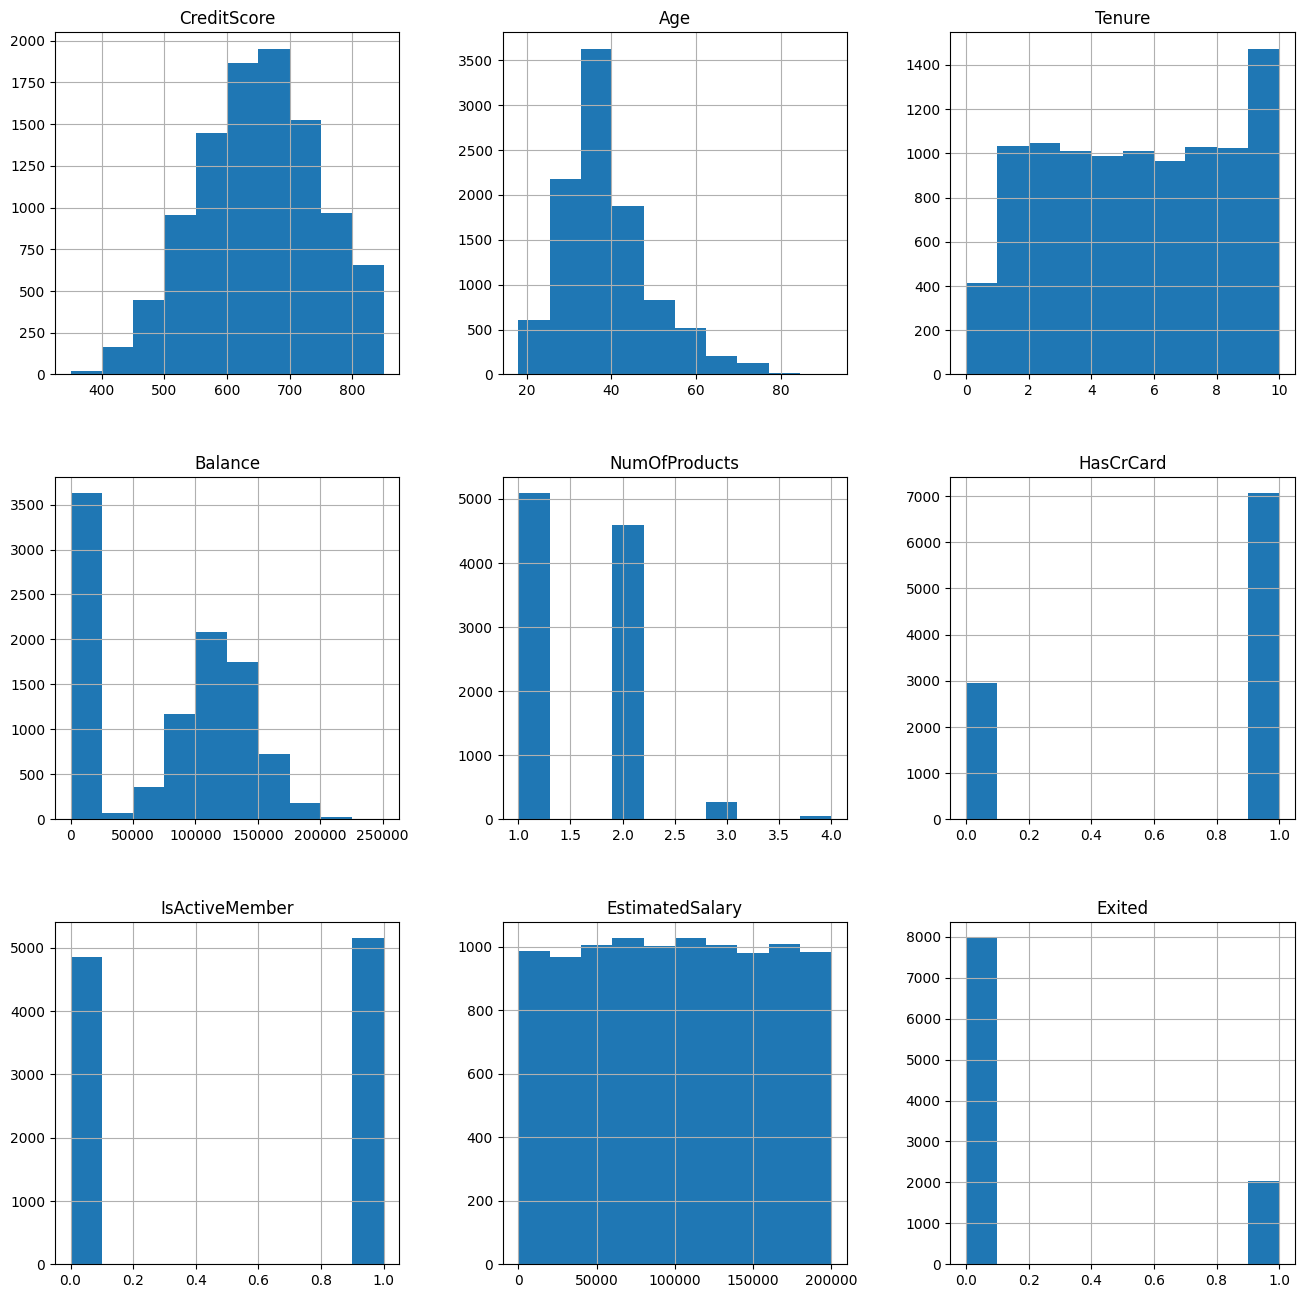

In [89]:
# Graph histogram
data.hist(figsize=(16,16))
plt.show()

In [90]:
# Check numerical cols skewness of data
data[num].skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

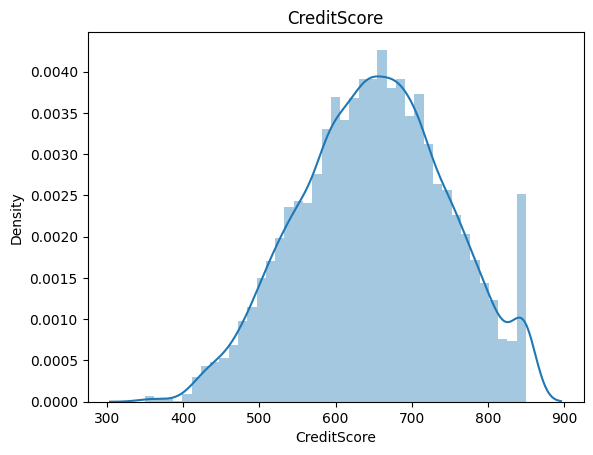

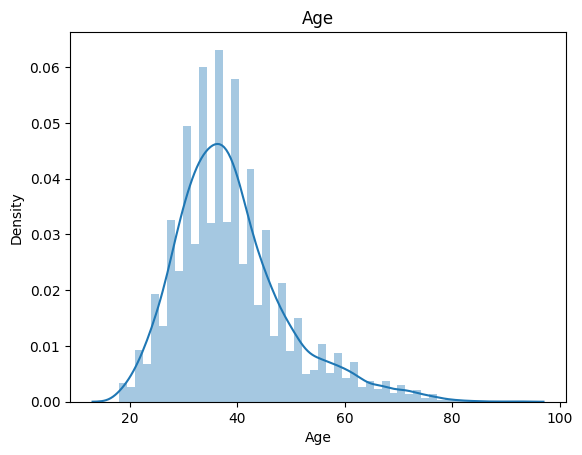

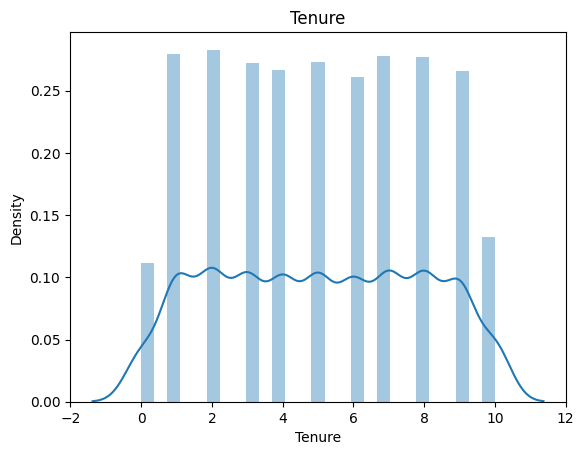

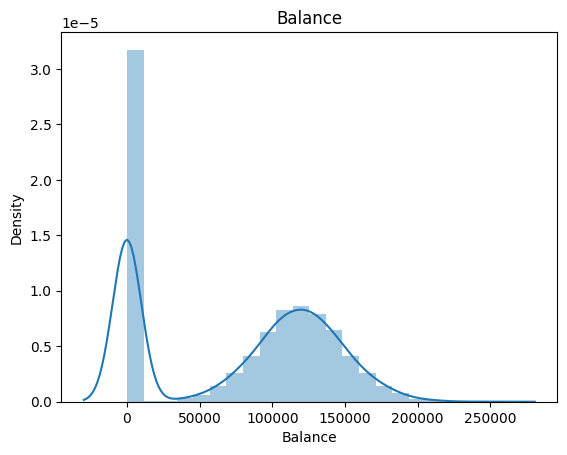

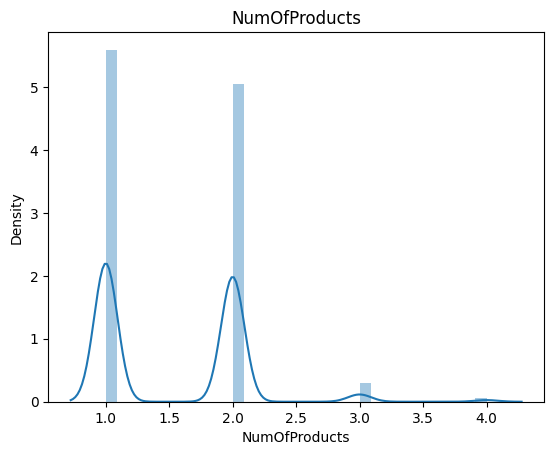

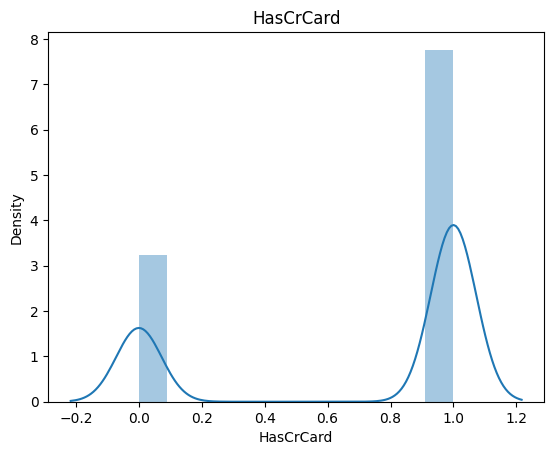

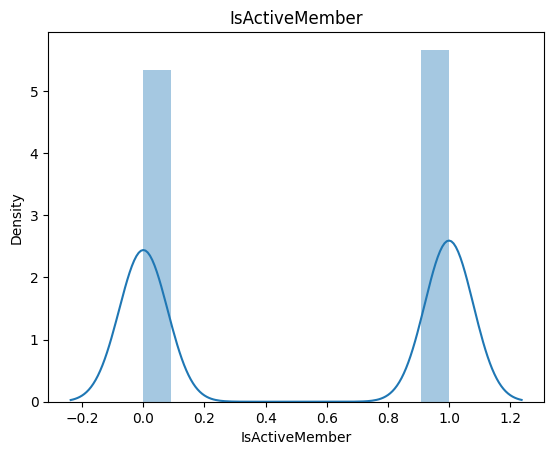

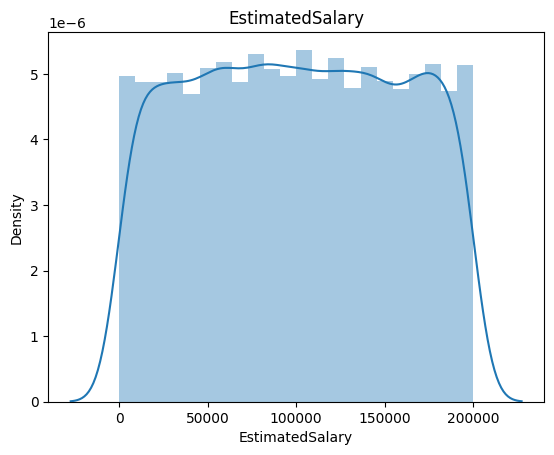

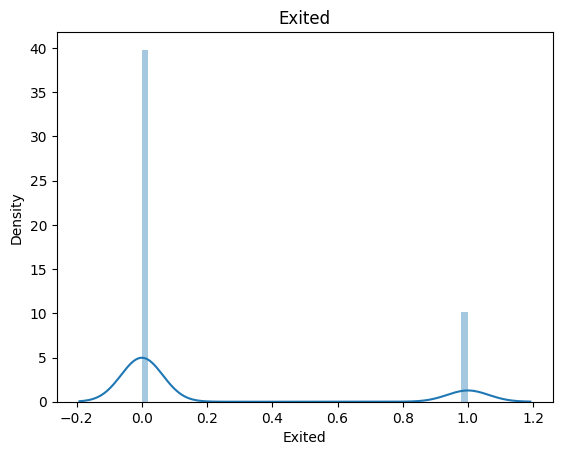

In [91]:
# Graph Distplot of numerical data
for i in num:
  sns.distplot(data[i])
  plt.title(i)
  plt.show()

### *Observation:*

- 1. Our numerical data is not normal distributed form.
- 2. Convert data into bell-curve/normal form.

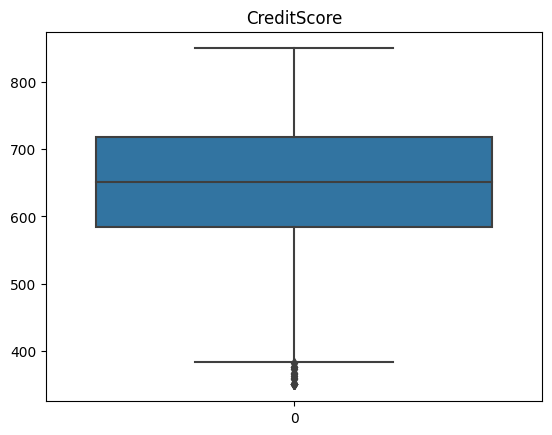

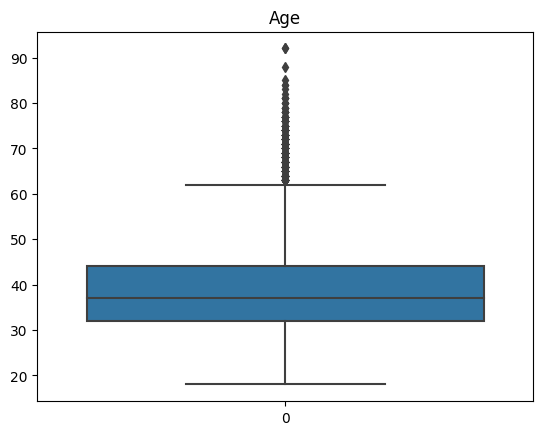

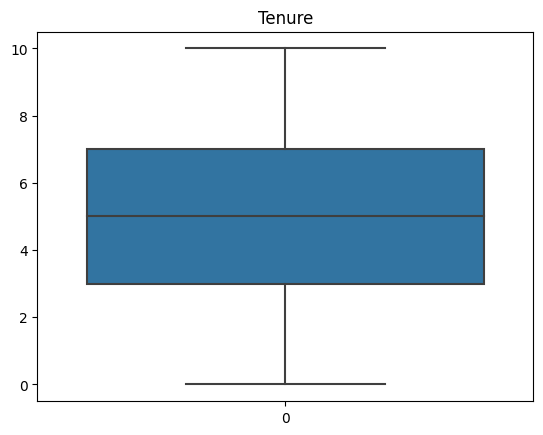

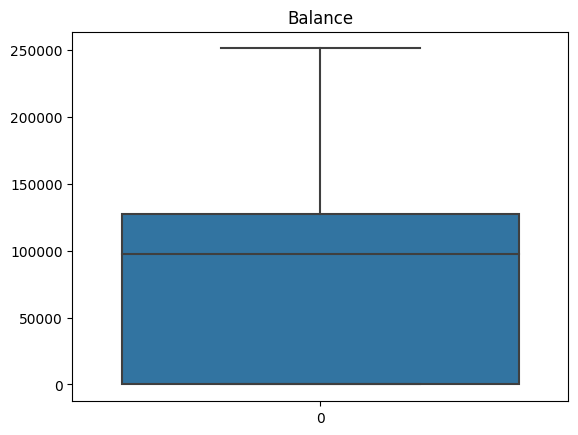

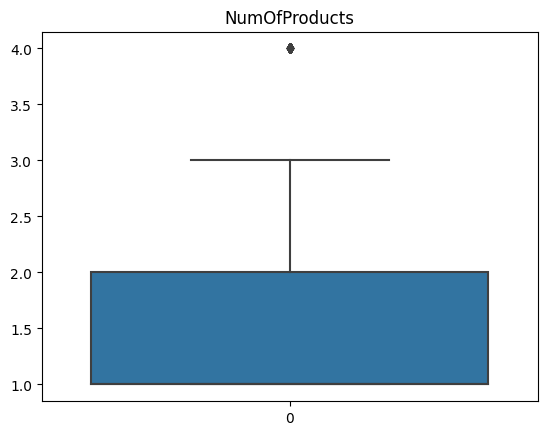

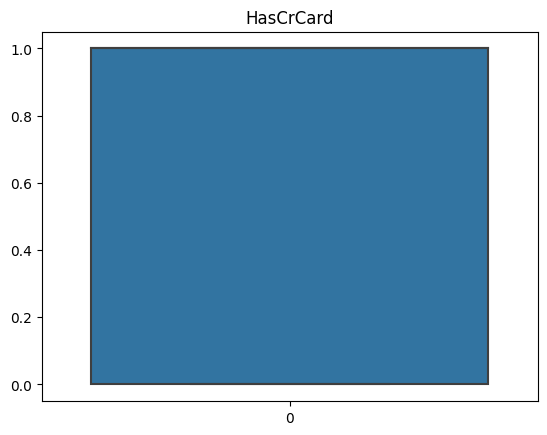

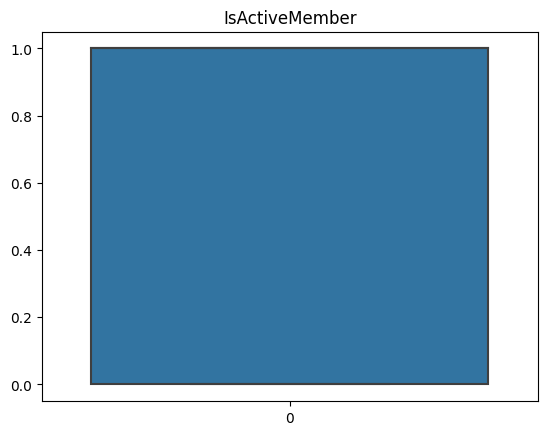

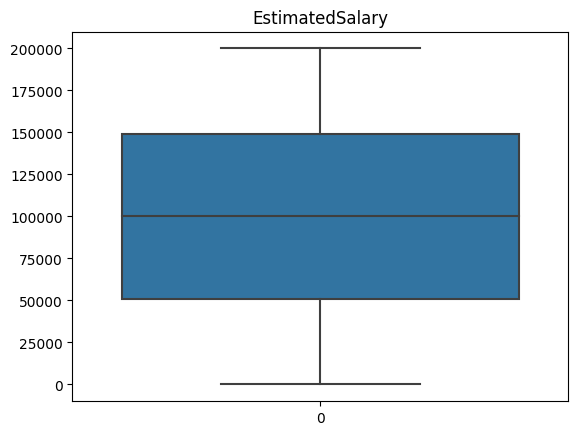

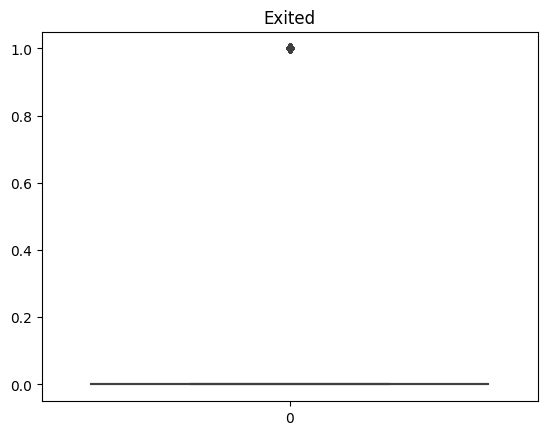

In [92]:
# Graph Boxplot of numerical data
for i in num:
  sns.boxplot(data[i])
  plt.title(i)
  plt.show()

### *Observation:*

- 1. CreditScore and Age have outliers.
- 2. Deal with outliers.

ii. Bivariant & Multivariant Analysis on numerical-to-numerical columns

In [93]:
# Top 5 rows of data
data.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [94]:
# Graph Boxplot of numerical-to-numerical data see the relationship
def box_num(x, y, df=data):
  sns.boxplot(data=df, x=x, y=y)
  plt.show()

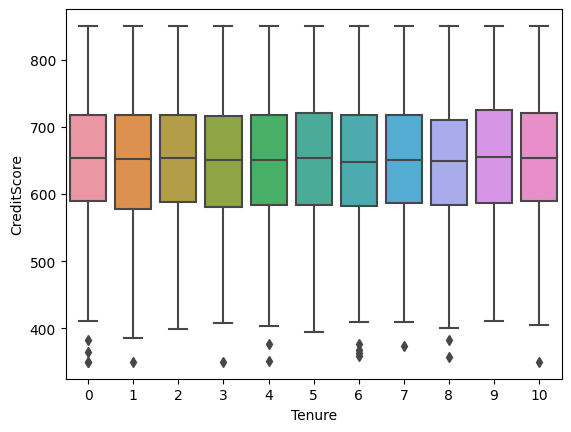

In [95]:
# Tenure & CreditScore cols relationship
box_num('Tenure', 'CreditScore')

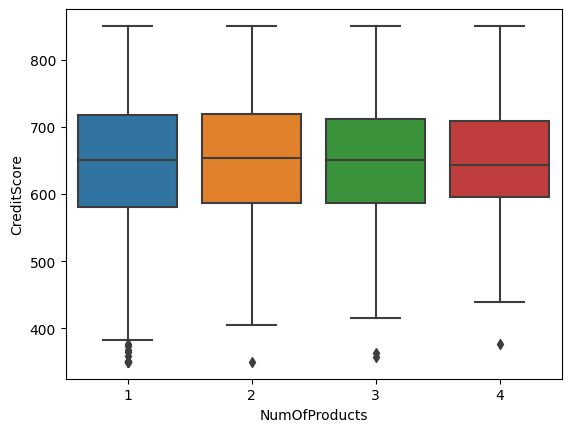

In [96]:
# NumOfProducts & CreditScore cols relationship
box_num('NumOfProducts', 'CreditScore')

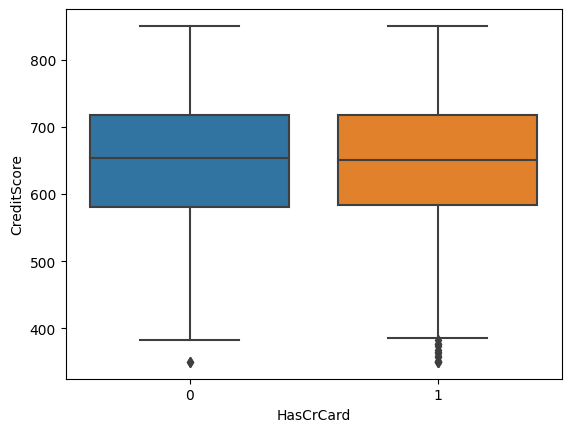

In [97]:
# HasCrCard & CreditScore cols relationship
box_num('HasCrCard', 'CreditScore')

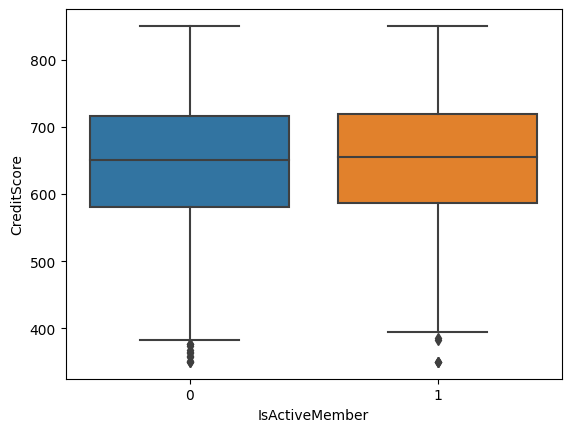

In [98]:
# IsActiveMember & CreditScore cols relationship
box_num('IsActiveMember', 'CreditScore')

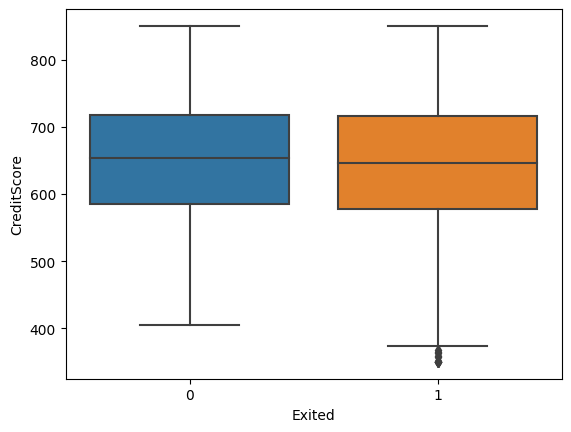

In [99]:
# Exited & CreditScore cols relationship
box_num('Exited', 'CreditScore')

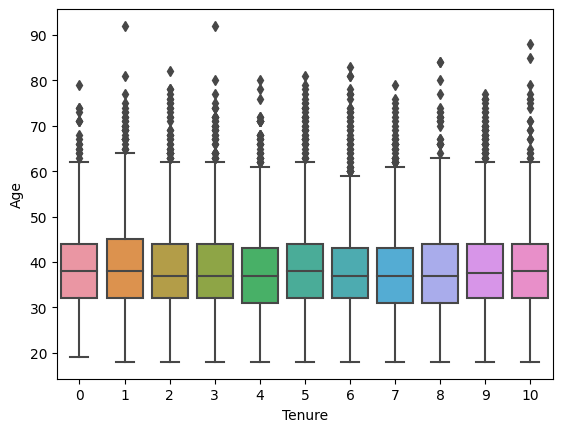

In [100]:
# Tenure & Age cols relationship
box_num('Tenure', 'Age')

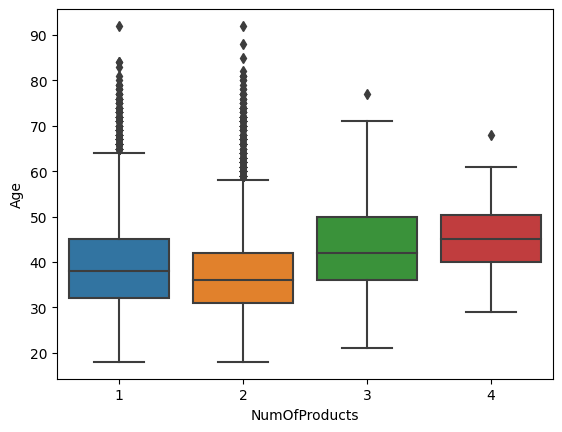

In [101]:
# NumOfProducts & Age cols relationship
box_num('NumOfProducts', 'Age')

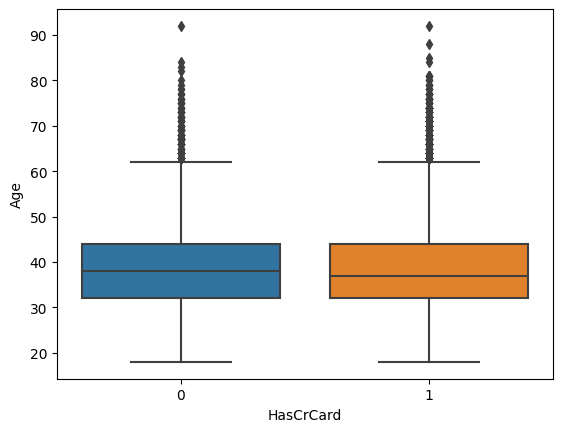

In [102]:
# HasCrCard & Age cols relationship
box_num('HasCrCard', 'Age')

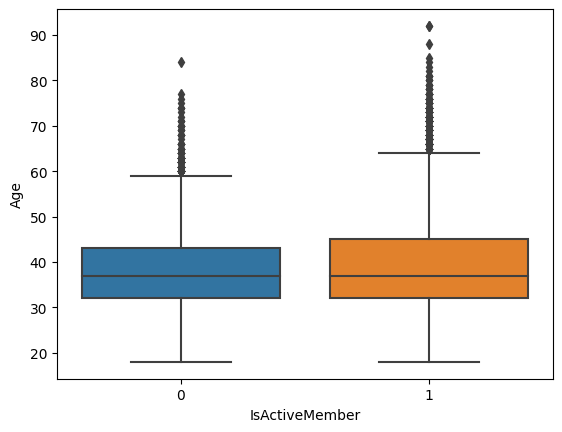

In [103]:
# IsActiveMember & Age cols relationship
box_num('IsActiveMember', 'Age')

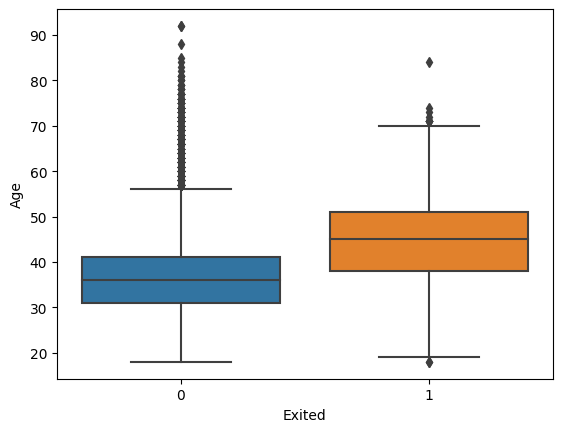

In [104]:
# Exited & Age cols relationship
box_num('Exited', 'Age')

In [105]:
# Graph Scatterplot of numerical-to-numerical data and see the relationship
def scatter_num(x, y, df=data):
  sns.scatterplot(data= df, x=x, y=y)
  plt.show()

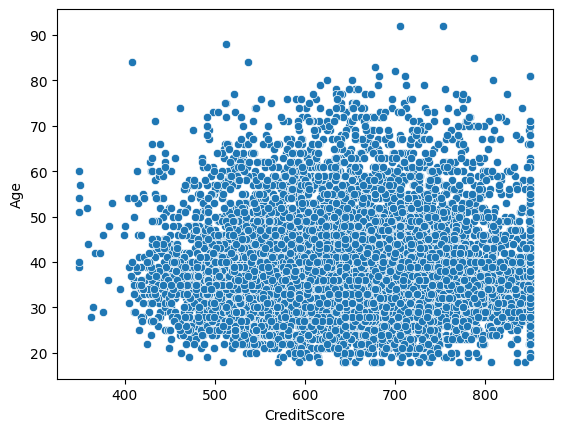

In [106]:
# CreditScore & Age cols relationship
scatter_num('CreditScore', 'Age')

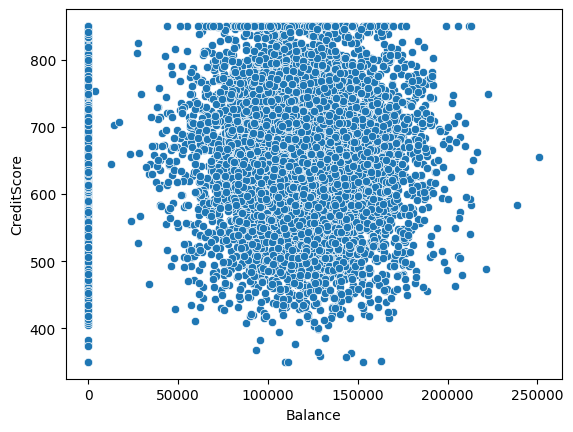

In [107]:
# CreditScore & Age cols relationship
scatter_num('Balance', 'CreditScore')

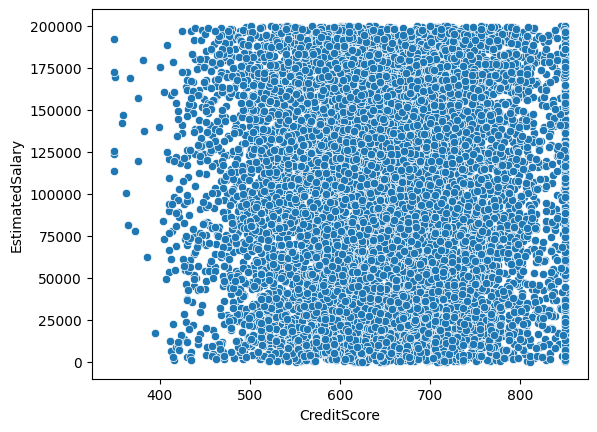

In [108]:
# CreditScore & EstimatedSalary cols relationship
scatter_num('CreditScore', 'EstimatedSalary')

### *Observation:*

- 1. Age, CreditScore and EstimatedSalary are continues data.

i. Univariant on Categorical Data

In [109]:
cat

['Geography', 'Gender']

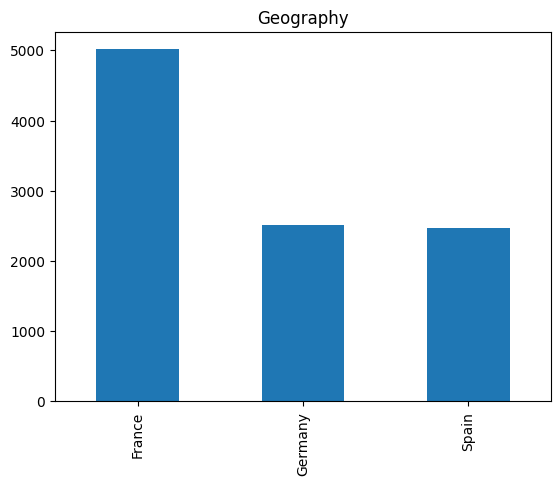

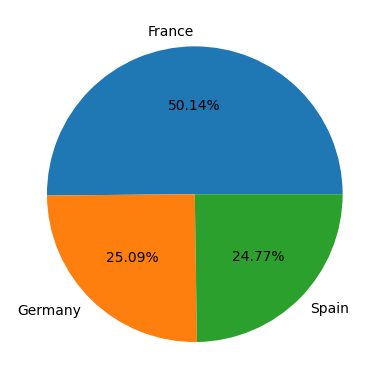

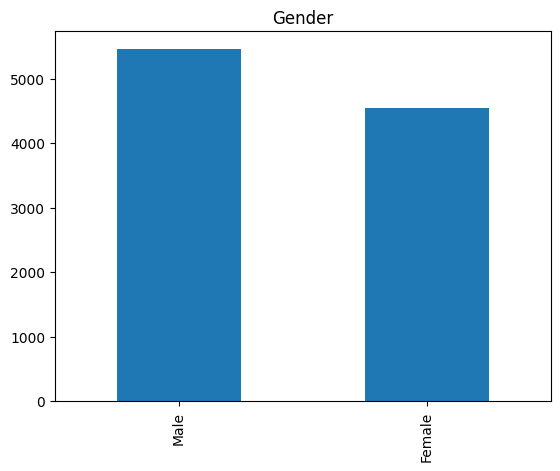

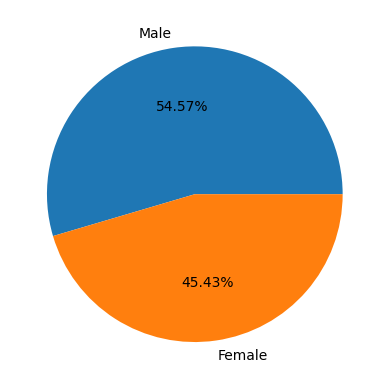

In [110]:
# Graph barplot of on cat cols
for i in cat:
    data[i].value_counts().plot(kind='bar')
    plt.title(i)
    plt.show()
    # Graph pie chart
    lab = data[i].value_counts().index
    plt.pie(data[i].value_counts(), labels= lab, autopct='%.2f%%')
    plt.show()

### *Observation:*

- 1. Thera are no much imbalanced data.

### ii. Bivariant & Multivariant Analysis on numerical-to-categorical data

In [111]:
# Graph violinplot of numerical-to-categorical data see the relationship
def num_cat(x, y, df=data):
  sns.violinplot(data= df, x=x, y=y)
  plt.show()

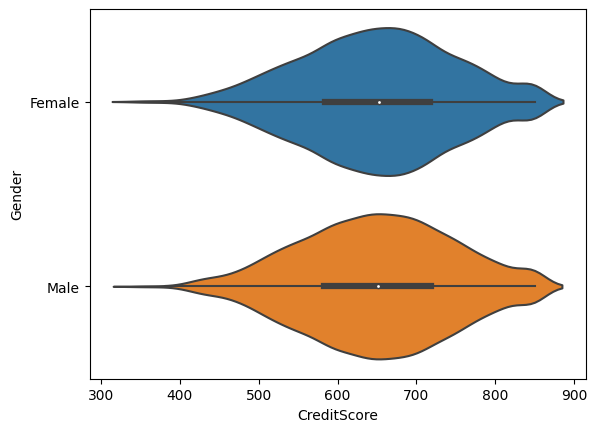

In [112]:
# CreditScore & Gender cols relationship
num_cat('CreditScore', 'Gender')

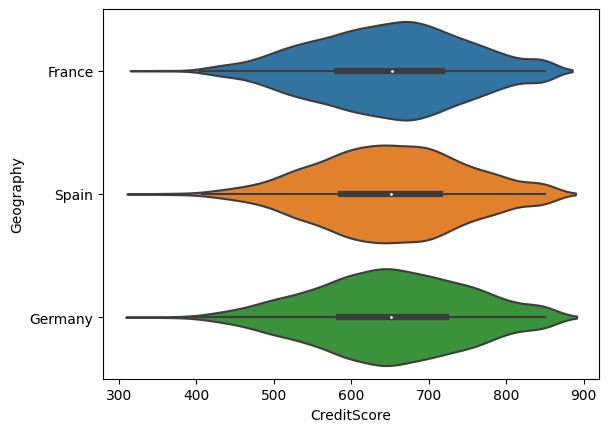

In [113]:
# CreditScore & Gender cols relationship
num_cat('CreditScore', 'Geography')

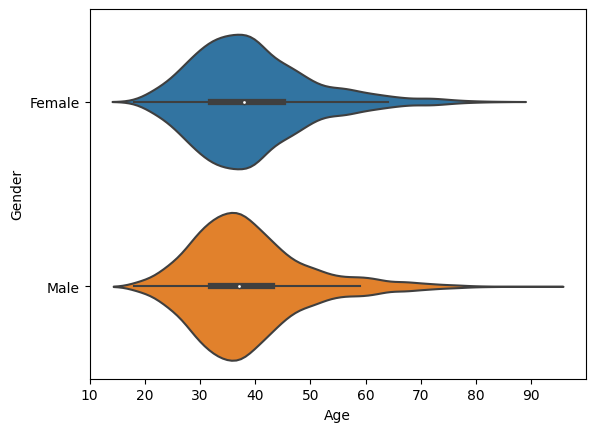

In [114]:
# Age & Gender cols relationship
num_cat('Age', 'Gender')

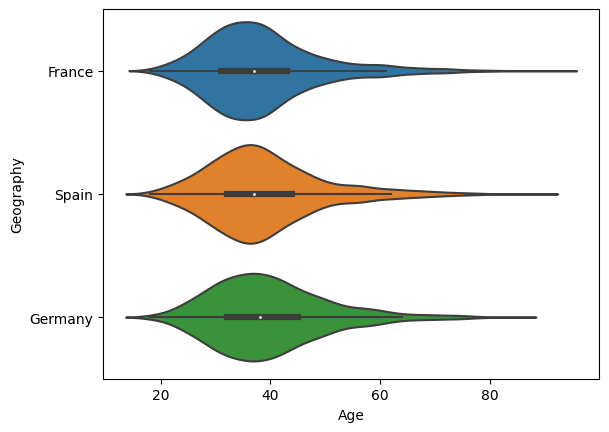

In [115]:
# Age & Geography cols relationship
num_cat('Age', 'Geography')

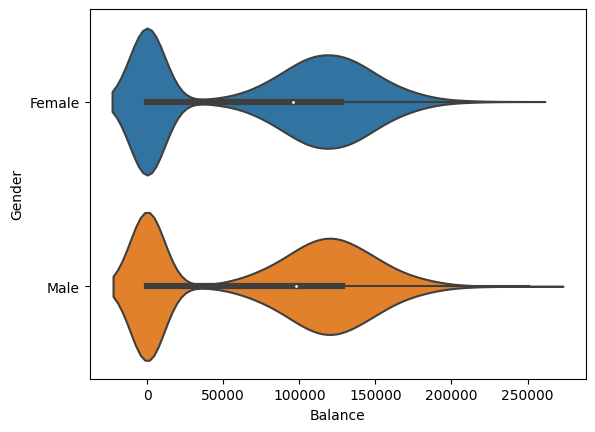

In [116]:
# Balance & Gender cols relationship
num_cat('Balance', 'Gender')

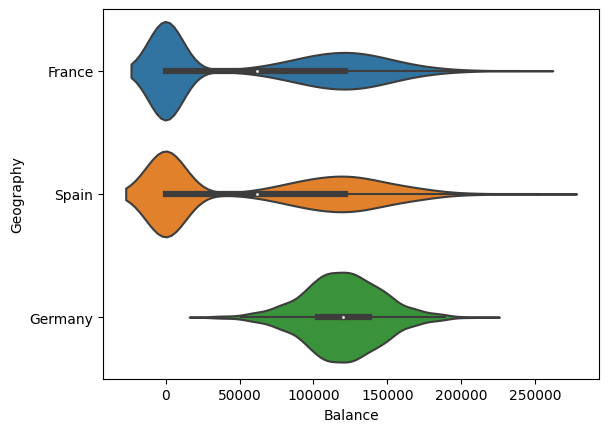

In [117]:
# Balance & Geography cols relationship
num_cat('Balance', 'Geography')

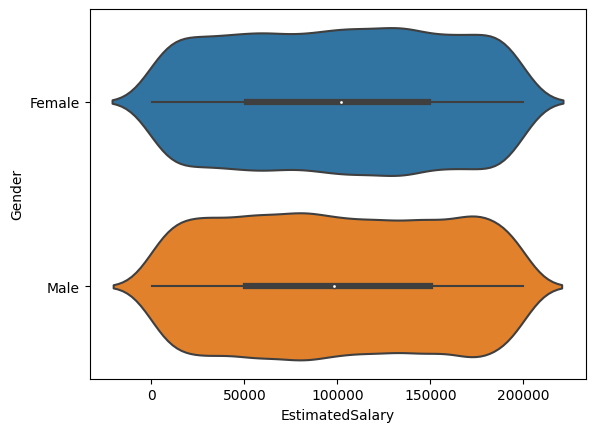

In [118]:
# EstimatedSalary & Gender cols relationship
num_cat('EstimatedSalary', 'Gender')

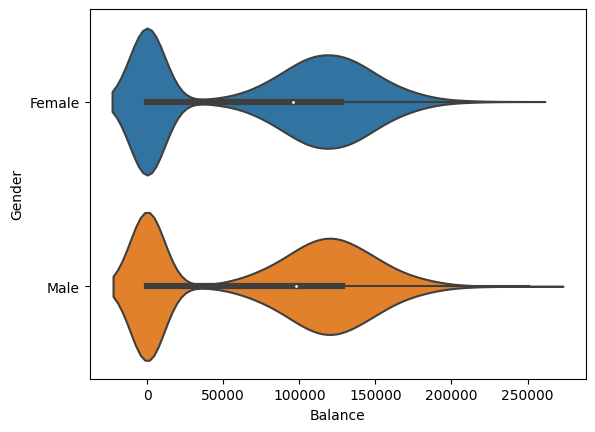

In [119]:
# Balance & Gender cols relationship
num_cat('Balance', 'Gender')

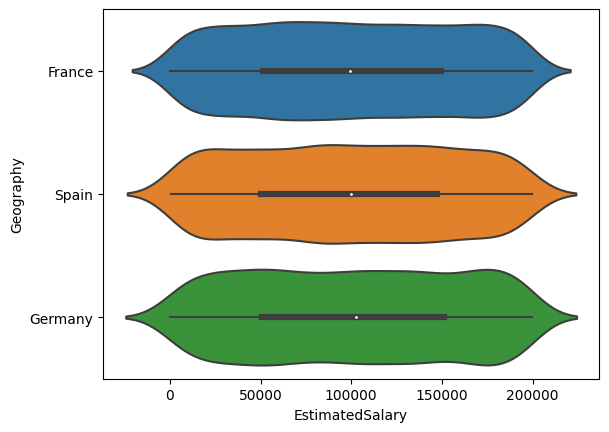

In [120]:
# EstimatedSalary & Geography cols relationship
num_cat('EstimatedSalary', 'Geography')

## 3. Data preprocessing

In [121]:
# First we deal with outliers
# Our data skewed we use IQR outlier technique
def outliers_capping(col):
    # Calculate quantile range
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define Upper & Lower bounds
    Upper = Q3 + 1.5 * IQR
    Lower = Q1 - 1.5 * IQR

    # Capping outliers
    data = np.where(
            col > Upper,
                   Upper,
                   np.where(
                       col < Lower,
                           Lower,
                           col
            ))

    print('Inerquartile Range Is :', IQR)
    print('Number of Outliers are : '+ str(len(data)))
    print('Upper Limit Is :', Upper)
    print('Lower Limit Is :', Lower)

    return data

In [122]:
# Capping outliers CreditScore column
outliers_capping(data['CreditScore'])

Inerquartile Range Is : 134.0
Number of Outliers are : 10000
Upper Limit Is : 919.0
Lower Limit Is : 383.0


array([619., 608., 502., ..., 709., 772., 792.])

In [123]:
# Capping outliers Age column
outliers_capping(data['Age'])

Inerquartile Range Is : 12.0
Number of Outliers are : 10000
Upper Limit Is : 62.0
Lower Limit Is : 14.0


array([42., 41., 42., ..., 36., 42., 28.])

In [124]:
# Convert categorical data into numerical form using onehotencoding technique
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first', dtype='int64', handle_unknown='ignore', sparse_output=False)
ohe.set_output(transform='pandas')

OneHotEncoder(drop='first', dtype='int64', handle_unknown='ignore',
              sparse_output=False)

In [125]:
# Convert categorical columns into numerical form
data_cat = ohe.fit_transform(data[cat])

In [126]:
# Drop ['Gender', 'Geography']
data.drop(columns=['Gender', 'Geography'], axis=1, inplace=True)

In [127]:
# Concatenate the encoding cols
data = pd.concat([data, data_cat], axis=1)

In [128]:
# 5 rows of Random diplay the data
data.sample(5)

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
4890          552   34       4       0.00              2          1   
9618          581   24       3   95508.20              1          1   
32            553   41       9  110112.54              2          0   
5006          755   37       0  113865.23              2          1   
1830          506   37       5       0.00              2          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
4890               0        140286.69       0                  0   
9618               1         45755.00       0                  0   
32                 0         81898.81       0                  1   
5006               1        117396.25       0                  1   
1830               1        127543.81       0                  0   

      Geography_Spain  Gender_Male  
4890                1            0  
9618                0            0  
32                  0            1  
5006                0            0  
1830                0            1

In [129]:
# Correlation between the features
cor = data.corr()['Exited'].sort_values(ascending=False)*100
print(cor)

Exited               100.000000
Age                   28.532304
Geography_Germany     17.348787
Balance               11.853277
EstimatedSalary        1.209686
HasCrCard             -0.713777
Tenure                -1.400061
CreditScore           -2.709354
NumOfProducts         -4.781986
Geography_Spain       -5.266676
Gender_Male          -10.651249
IsActiveMember       -15.612828
Name: Exited, dtype: float64


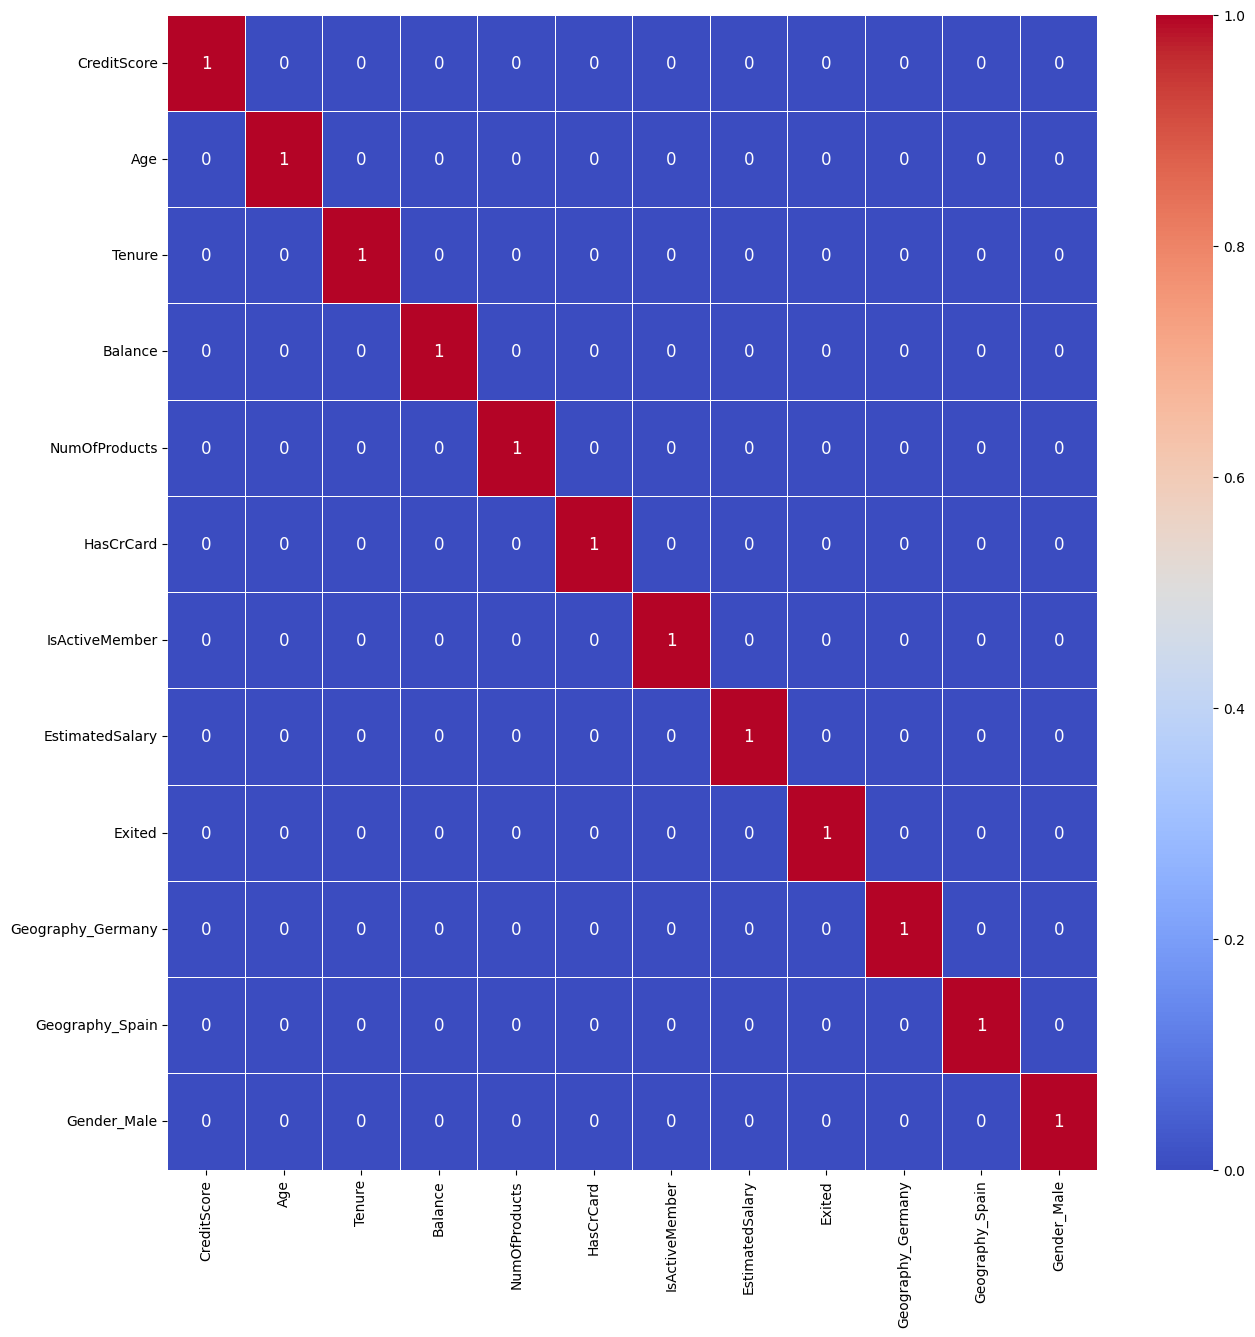

In [130]:
# Graph heatmap of correlation
plt.figure(figsize=(15,15))
sns.heatmap(data.corr()>0.7, cmap='coolwarm', annot=True, annot_kws={'size': 12}, linewidths= .7)
plt.show()

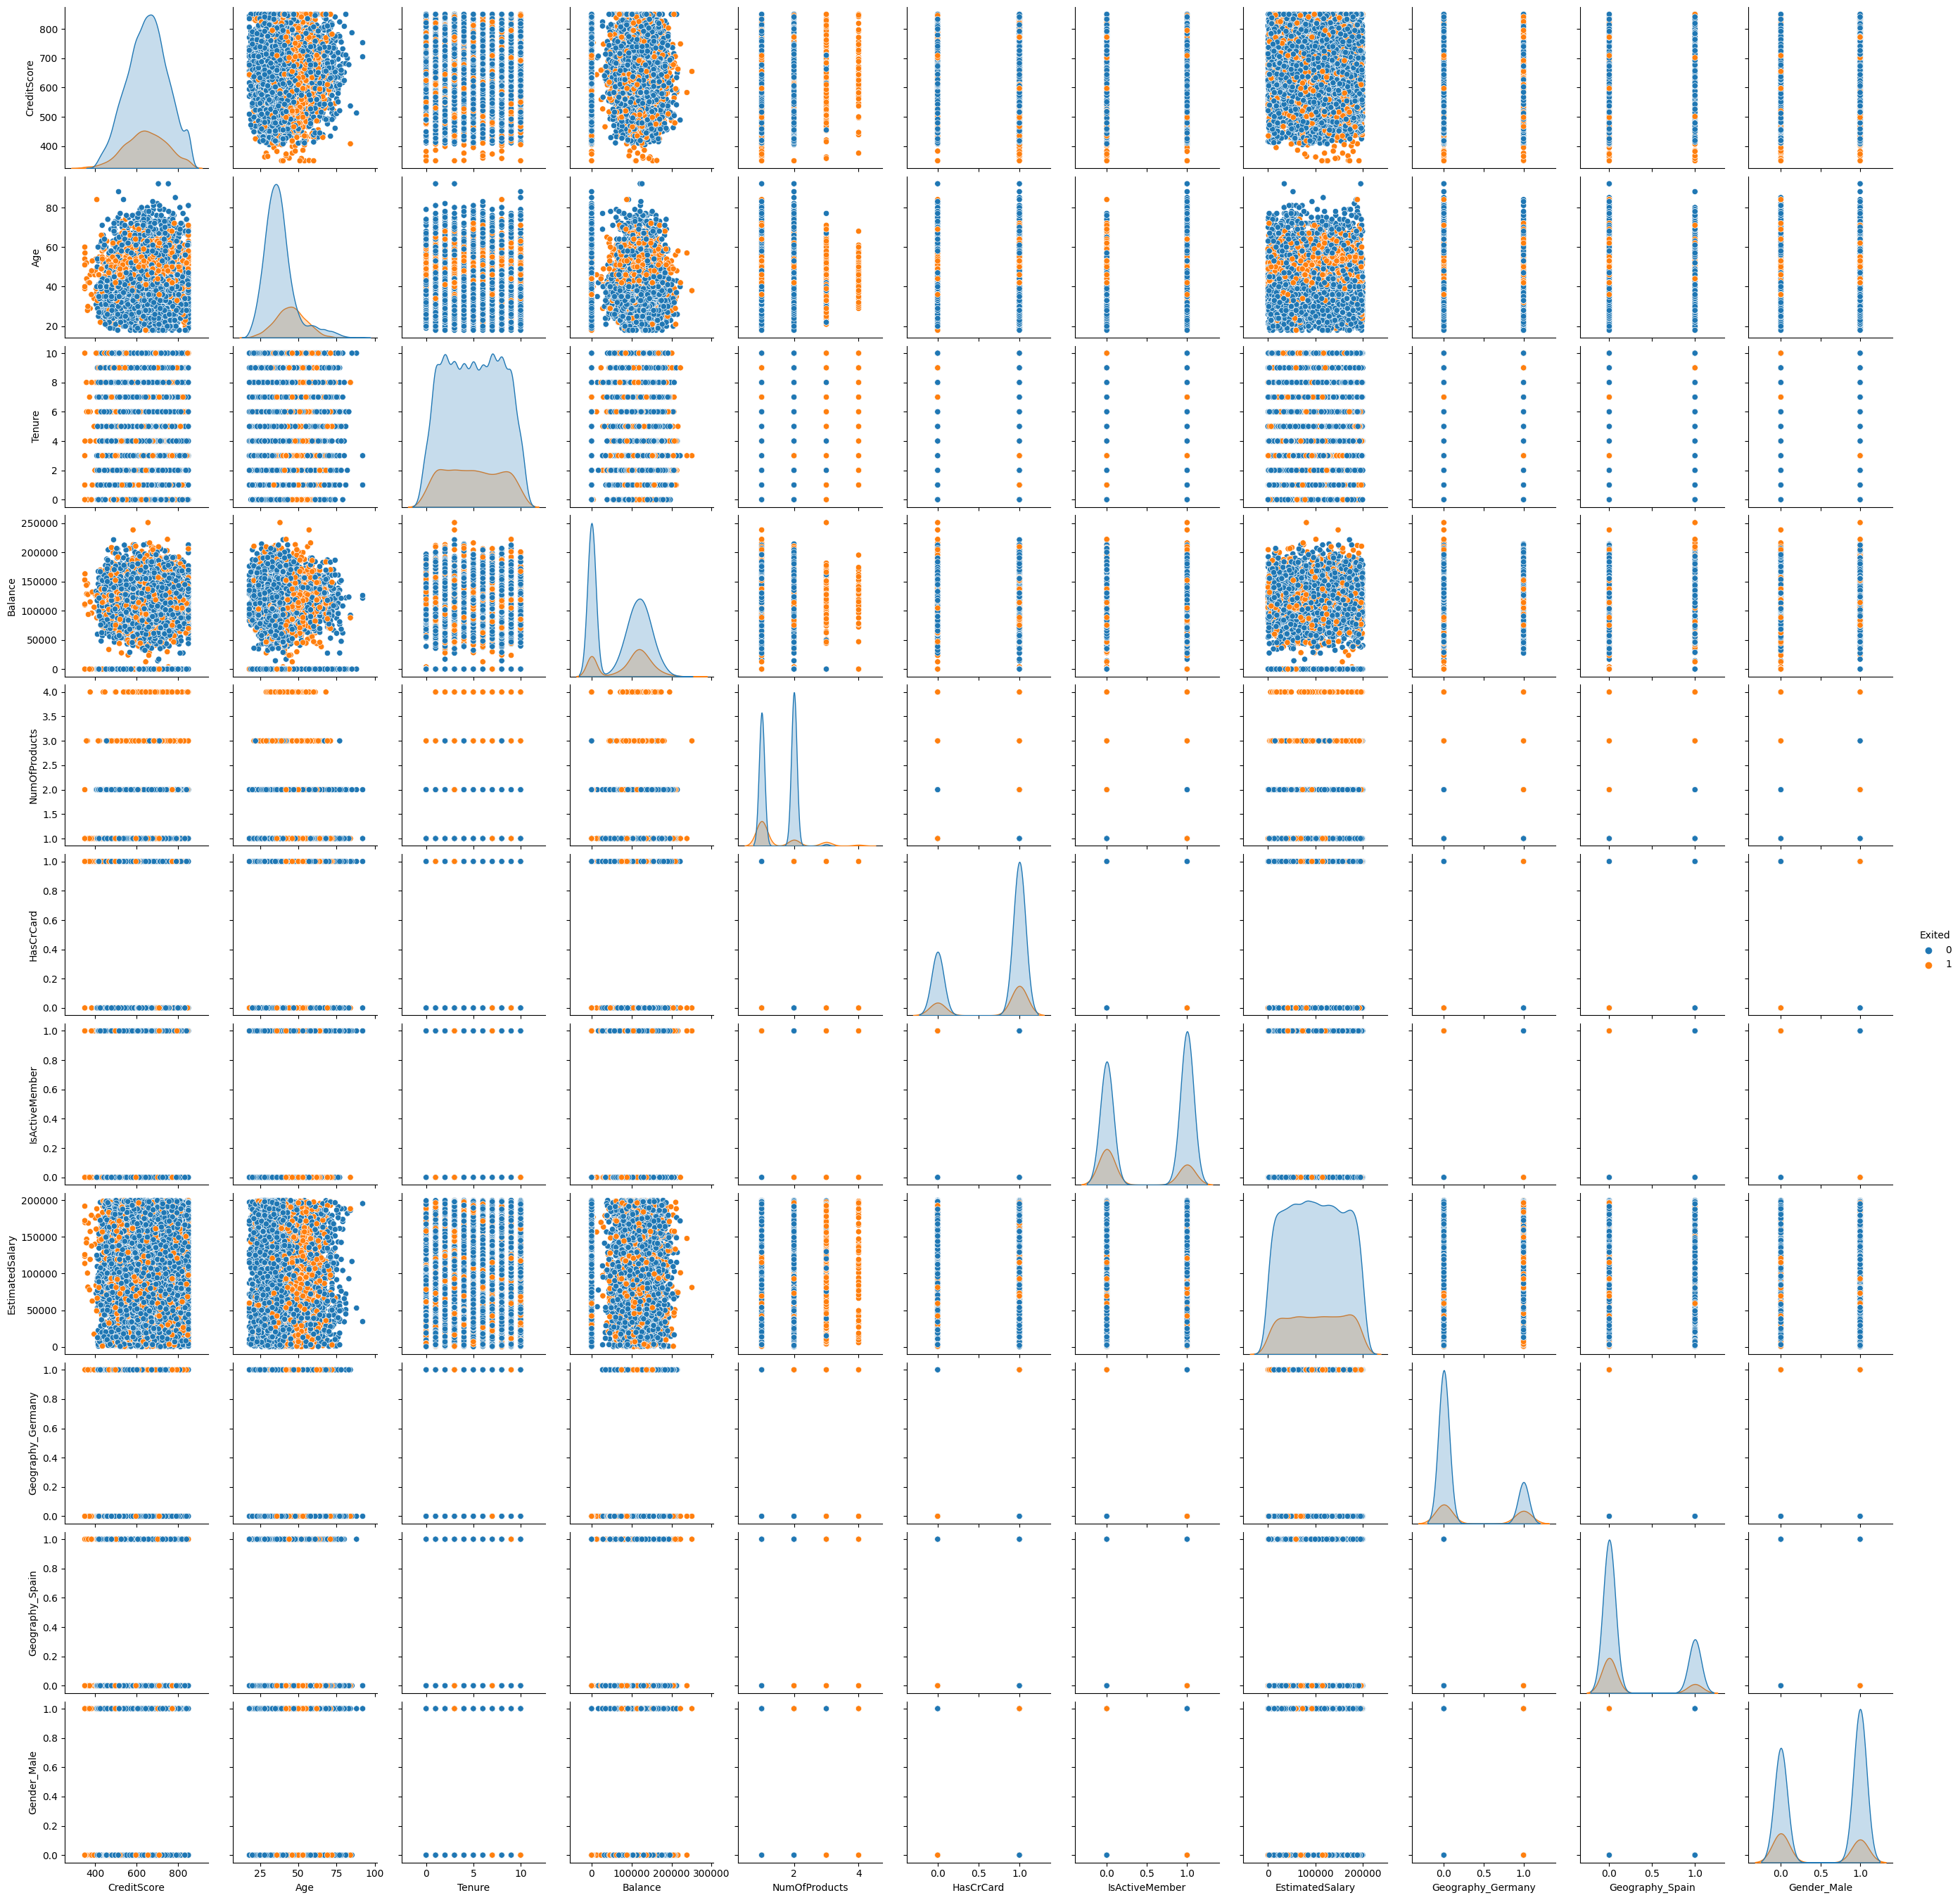

In [131]:
# Graph pairplot
sns.pairplot(data, hue='Exited')
plt.show()

In [132]:
from sklearn.preprocessing import PowerTransformer
qwt = PowerTransformer(method='yeo-johnson')
qwt.set_output(transform='pandas')

PowerTransformer()

In [133]:
# Split data into featue x and y
x = data.drop(columns='Exited', axis=1)
y = data['Exited']

In [134]:
# Transform independent features
x_qwt = qwt.fit_transform(x)

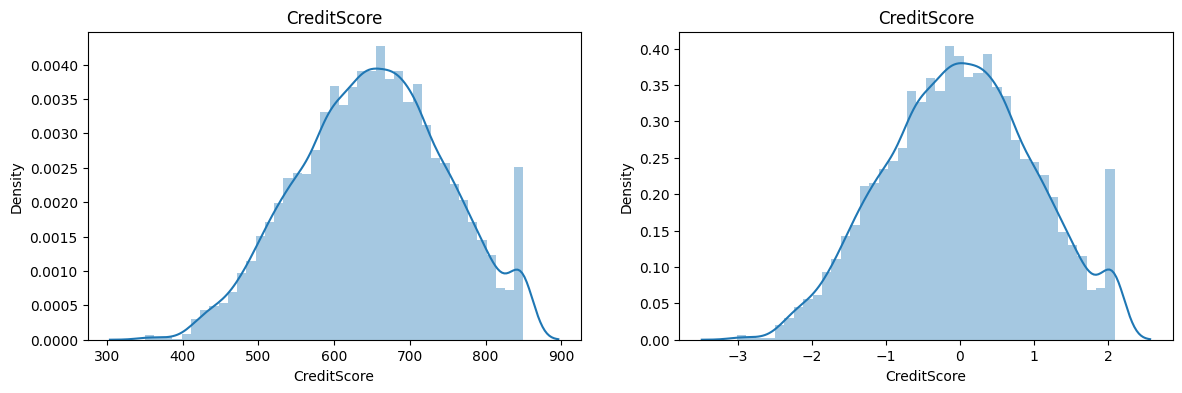

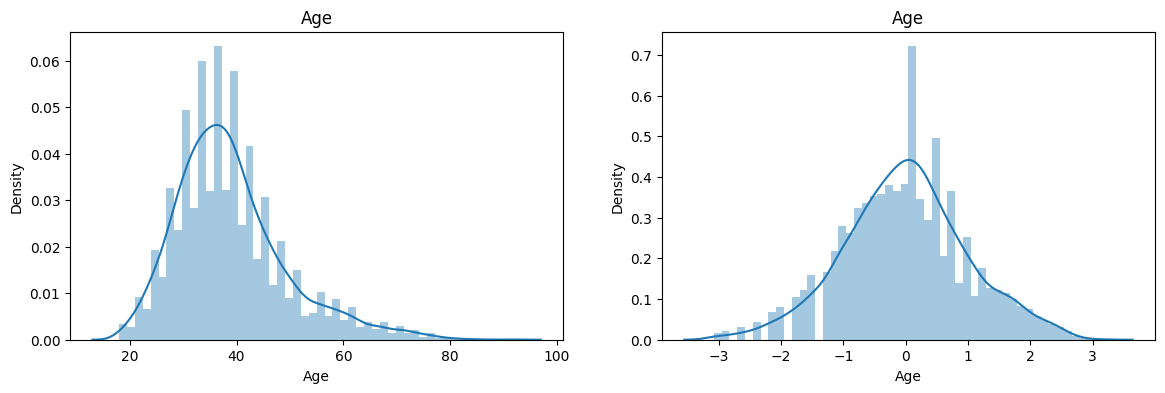

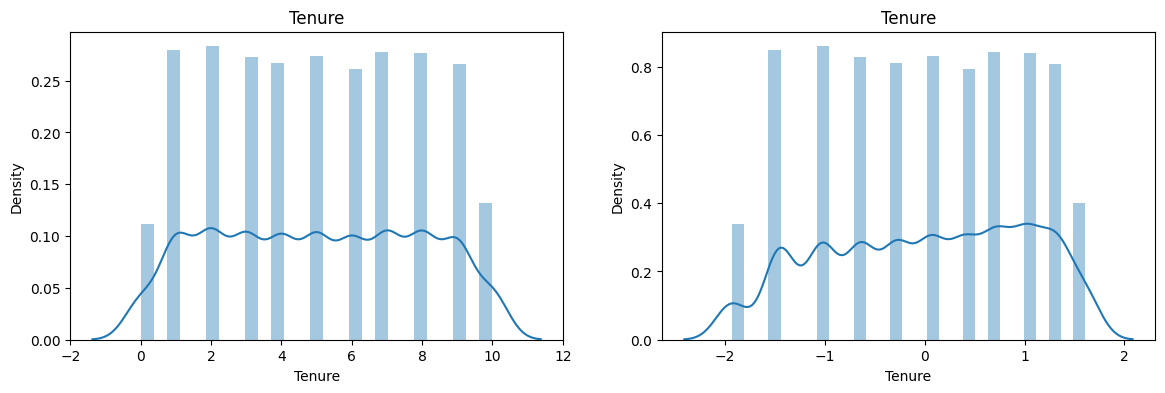

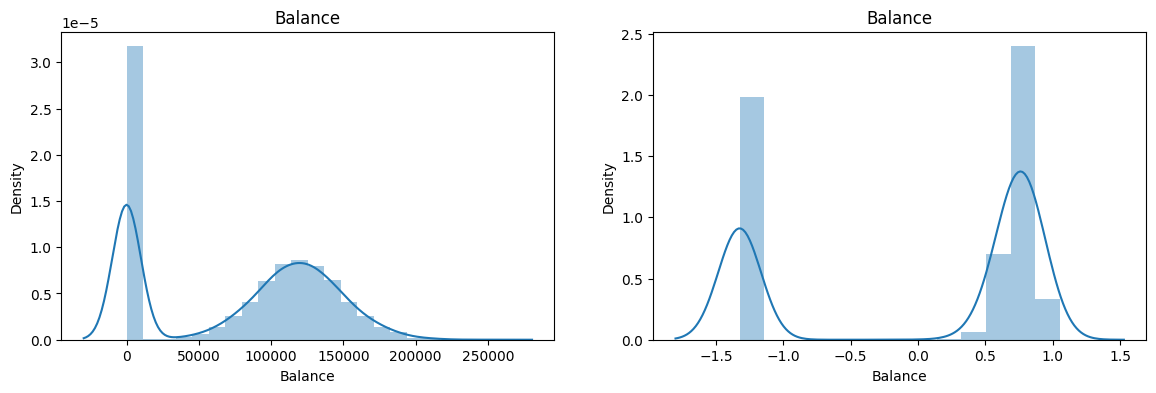

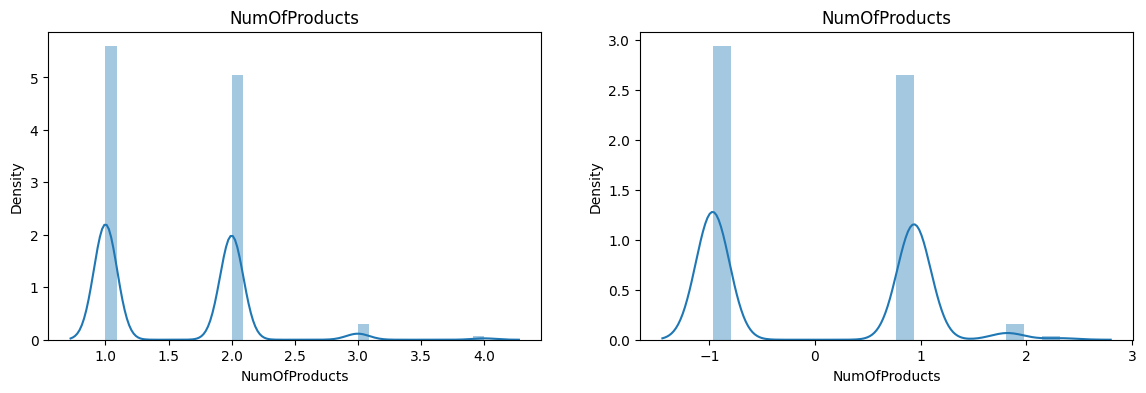

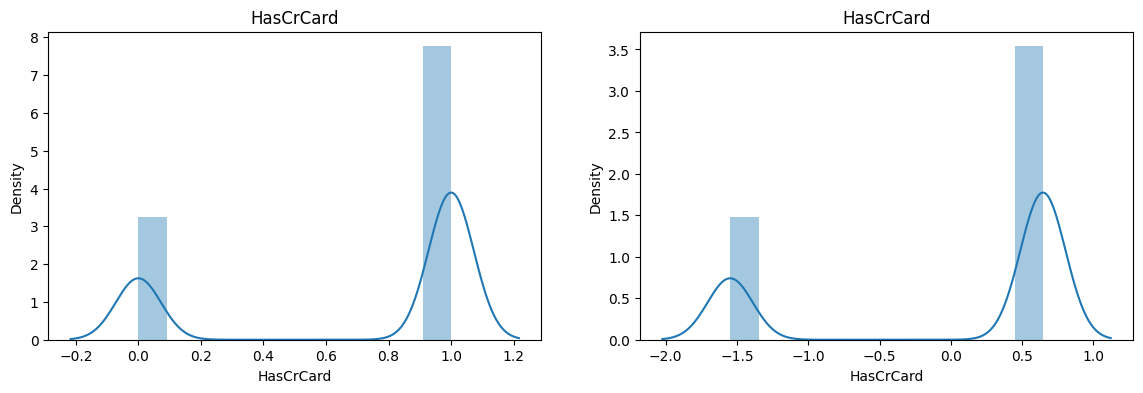

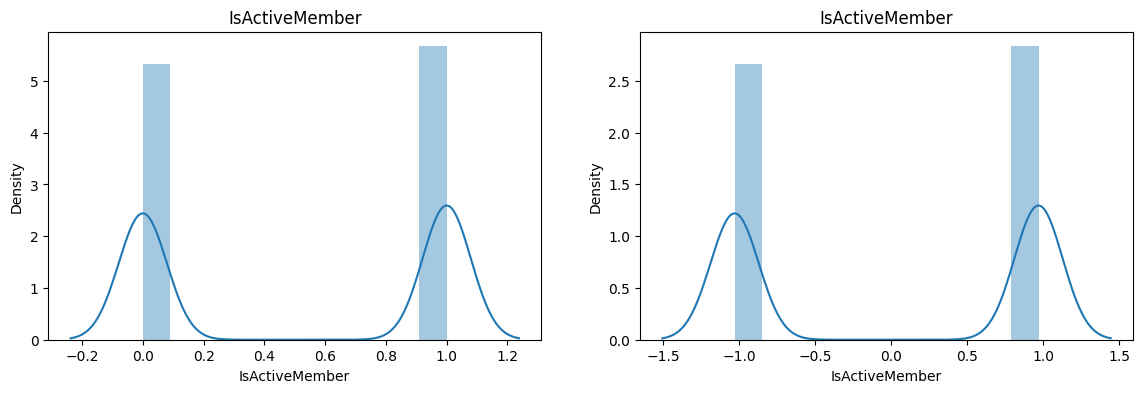

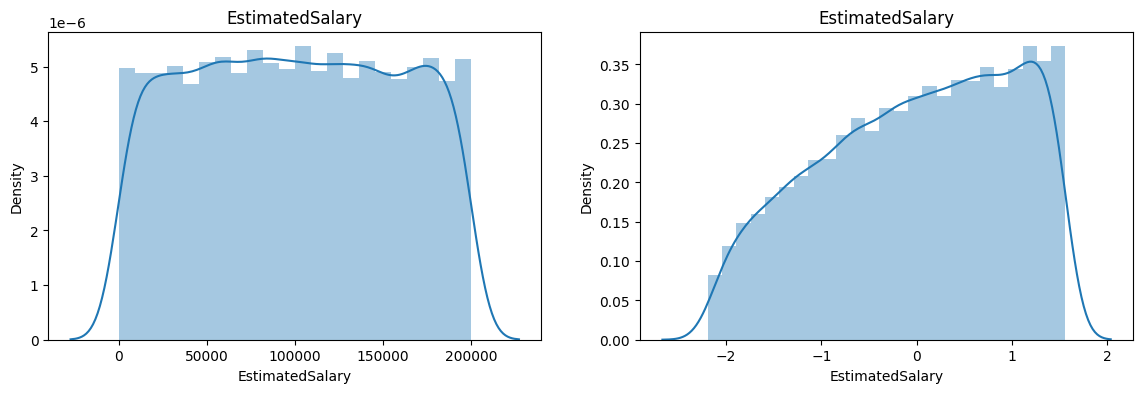

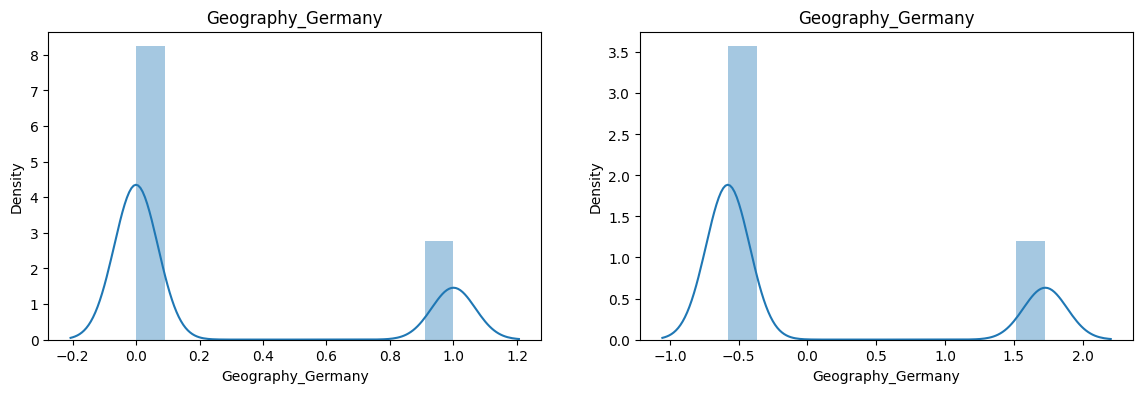

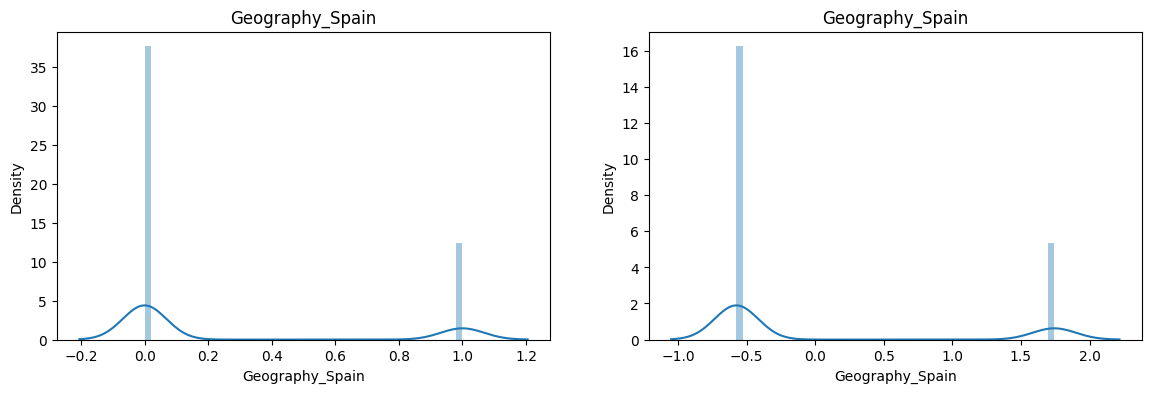

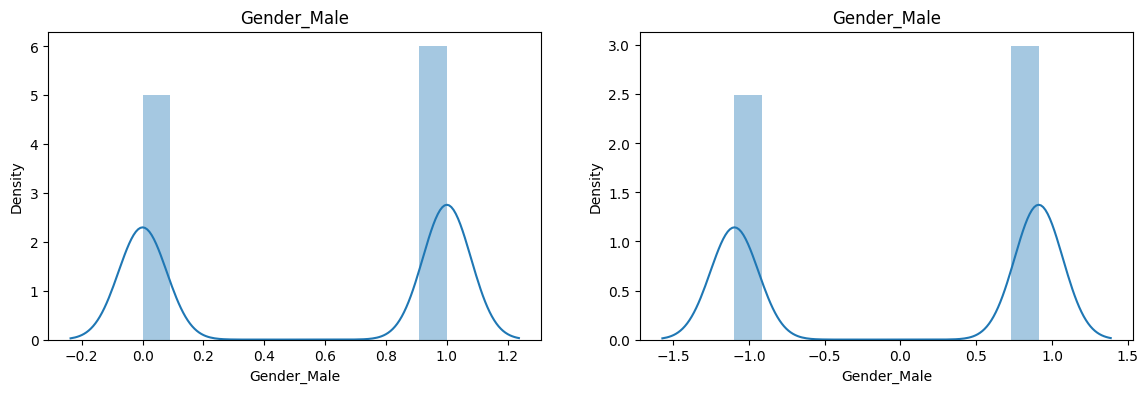

In [135]:
# Before and after comparision
for col in x_qwt.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(x_qwt[col])
    plt.title(col)

    plt.show()

## 4. DL Model building & evaluation

In [136]:
# Split arrays or matrices into random train and test subsets.
from sklearn.model_selection import train_test_split

In [137]:
# Split featues into X and y
X = x_qwt
y = y

In [138]:
# Use train_test_split to divide the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [139]:
# Use Tensorflow library
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [161]:
model = Sequential()

In [162]:
model.add(Dense(11, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(11, activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [163]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 dense_7 (Dense)             (None, 11)                132       
                                                                 
 dense_8 (Dense)             (None, 11)                132       
                                                                 
 dense_9 (Dense)             (None, 1)                 12        
                                                                 
Total params: 408 (1.59 KB)
Trainable params: 408 (1.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [164]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy']) # binary_crossentropy, accuracy

In [165]:
history = model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=1, validation_split=0.2)

Epoch 1/100
256/256 [==============================] - 2s 3ms/step - loss: 0.4913 - accuracy: 0.7948 - val_loss: 0.4503 - val_accuracy: 0.7981
Epoch 2/100
256/256 [==============================] - 1s 3ms/step - loss: 0.4347 - accuracy: 0.8102 - val_loss: 0.4342 - val_accuracy: 0.8119
Epoch 3/100
256/256 [==============================] - 1s 3ms/step - loss: 0.4227 - accuracy: 0.8173 - val_loss: 0.4277 - val_accuracy: 0.8169
Epoch 4/100
256/256 [==============================] - 1s 3ms/step - loss: 0.4166 - accuracy: 0.8198 - val_loss: 0.4248 - val_accuracy: 0.8219
Epoch 5/100
256/256 [==============================] - 1s 2ms/step - loss: 0.4128 - accuracy: 0.8214 - val_loss: 0.4200 - val_accuracy: 0.8263
Epoch 6/100
256/256 [==============================] - 1s 2ms/step - loss: 0.4094 - accuracy: 0.8272 - val_loss: 0.4166 - val_accuracy: 0.8294
Epoch 7/100
256/256 [==============================] - 1s 3ms/step - loss: 0.4065 - accuracy: 0.8264 - val_loss: 0.4134 - val_accuracy: 0.8300

In [166]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [167]:
y_pred

array([[0.08336612],
       [0.68098474],
       [0.94435006],
       ...,
       [0.08038258],
       [0.02160368],
       [0.02810165]], dtype=float32)

In [168]:
pred = np.argmax(y_pred, axis=1)

In [191]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [149]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [192]:
accuracy_score(y_test, pred)

0.7905

In [193]:
confusion_matrix(y_test, pred)

array([[1581,    0],
       [ 419,    0]])

In [194]:
model.evaluate(X_test, y_test, verbose=1)

63/63 [==============================] - 1s 5ms/step - loss: 0.3640 - accuracy: 0.8575


[0.36402663588523865, 0.8575000166893005]

In [160]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

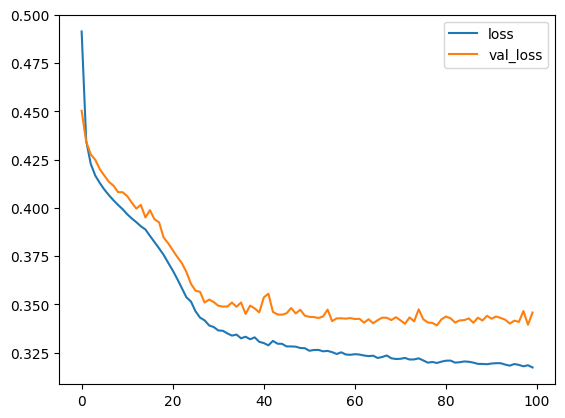

In [195]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

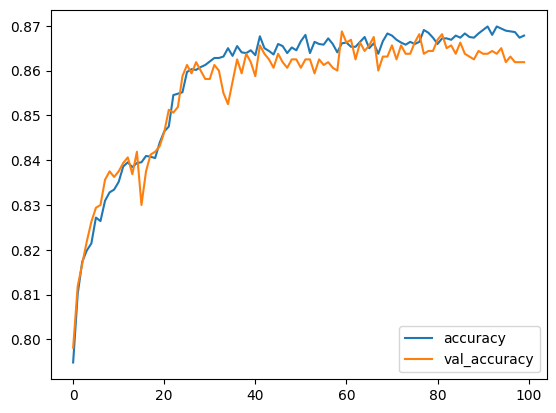

In [196]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()